In [1]:
import os
import cv2
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

In [2]:
visual_path = os.path.join("benchmarks", "visual")

naive_folder = os.path.join(visual_path, "naive")
relaxed_folder = os.path.join(visual_path, "relaxed")
enhanced_folder = os.path.join(visual_path, "enhanced")
cone_folder = os.path.join(visual_path, "cone")

if (not (os.path.isdir(naive_folder) and os.path.isdir(relaxed_folder) and os.path.isdir(enhanced_folder) and os.path.isdir(cone_folder))):
    print("couldn't find/open the necesseary directories")

In [3]:
baseline_file_path = os.path.join(visual_path, "screenshot_baseline.png")

(512, 640, 3)


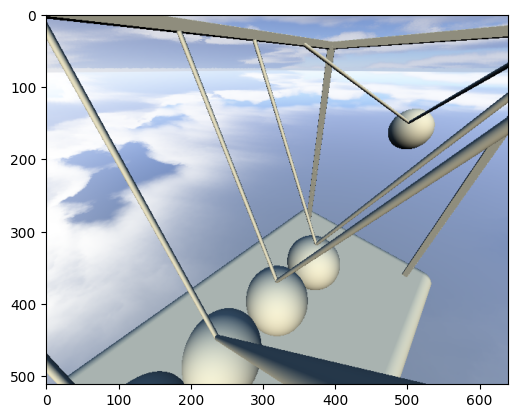

In [4]:
baseline_image_bgr = cv2.imread(baseline_file_path)
baseline_image_rgb = cv2.cvtColor(baseline_image_bgr, cv2.COLOR_BGR2RGB)
baseline_image_gray = cv2.cvtColor(baseline_image_bgr, cv2.COLOR_BGR2GRAY)
print(baseline_image_rgb.shape)

plt.imshow(baseline_image_rgb)
plt.show()

In [5]:
benchmark_filenames = {}

for dir_name in os.listdir(visual_path):
    sub_dir_path = os.path.join(visual_path, dir_name)
    if (os.path.isdir(sub_dir_path)):
        benchmark_filenames[dir_name] = os.listdir(sub_dir_path)

In [6]:
benchmark_images = {}

for method, filenames in benchmark_filenames.items():
    folder_path = os.path.join(visual_path, method)

    benchmark_images[method] = []
    for filename in filenames:
        benchmark_file_path = os.path.join(folder_path, filename)
        benchmark_image_bgr = cv2.imread(benchmark_file_path)
        max_iteration_count = int((os.path.basename(benchmark_file_path).split(".")[-2]).split("_")[-1])
        benchmark_images[method].append((max_iteration_count, benchmark_image_bgr))

    benchmark_images[method].sort(key=lambda x: x[0])
        

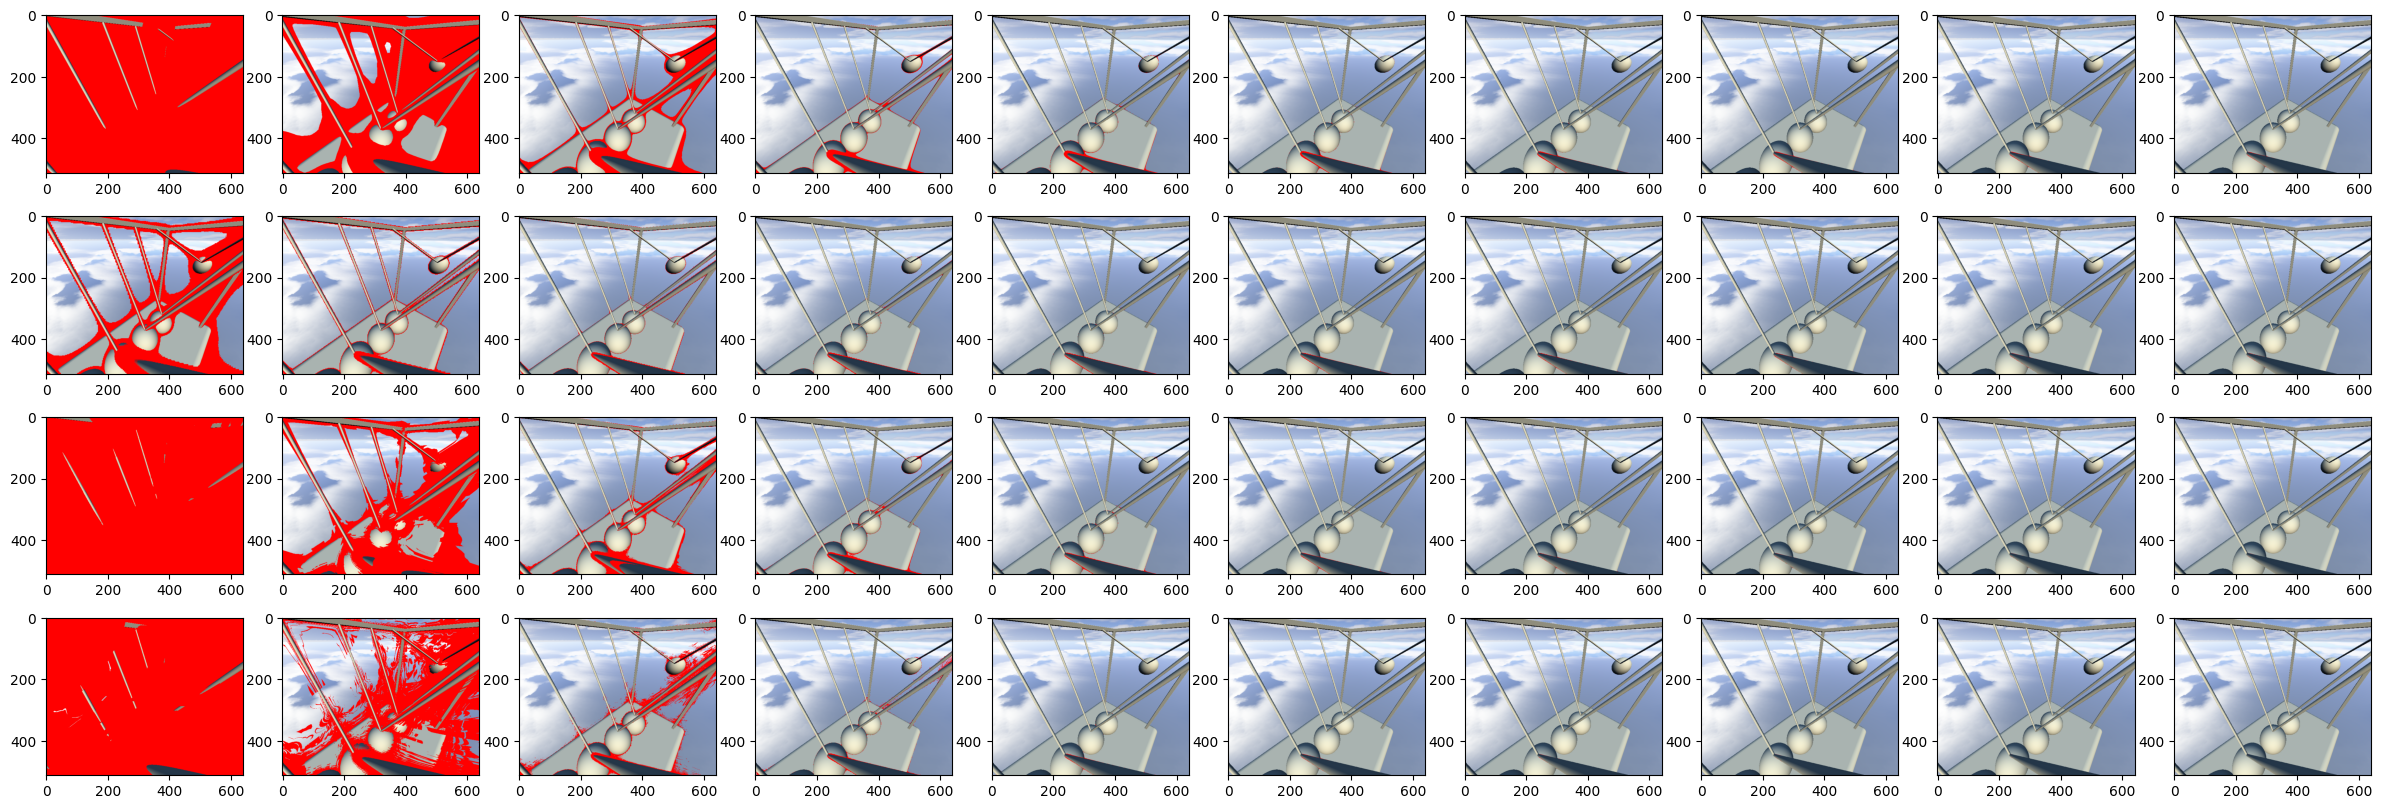

In [7]:
h = len(benchmark_images)
w = max([len(images) for _, images in benchmark_images.items()])

fig = plt.figure(figsize=(30, 10))

for y, (method, images) in enumerate(benchmark_images.items()):
    for x, (max_iteration_count, image_bgr) in enumerate(images):
        image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
        
        index = y * w + x + 1
        fig.add_subplot(h, w, index)
        plt.imshow(image_rgb)

plt.show()

In [8]:
for method, images in benchmark_images.items():
    print(method, end=": ")
    for (max_iteration_count, image_bgr) in images:
        image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

        (ssim_score, _) = ssim(baseline_image_gray, image_gray, full=True)
        print(max_iteration_count, round(ssim_score, 3), end=" ")

    print()

naive: 10 0.531 20 0.64 30 0.826 40 0.934 50 0.977 60 0.988 70 0.994 80 0.996 90 0.997 100 0.998 
cone: 10 0.709 20 0.849 30 0.943 40 0.982 50 0.991 60 0.994 70 0.996 80 0.997 90 0.998 100 0.998 
relaxed: 10 0.521 20 0.653 30 0.873 40 0.96 50 0.983 60 0.989 70 0.991 80 0.993 90 0.993 100 0.993 
enhanced: 10 0.516 20 0.491 30 0.838 40 0.968 50 0.991 60 0.994 70 0.995 80 0.995 90 0.995 100 0.995 


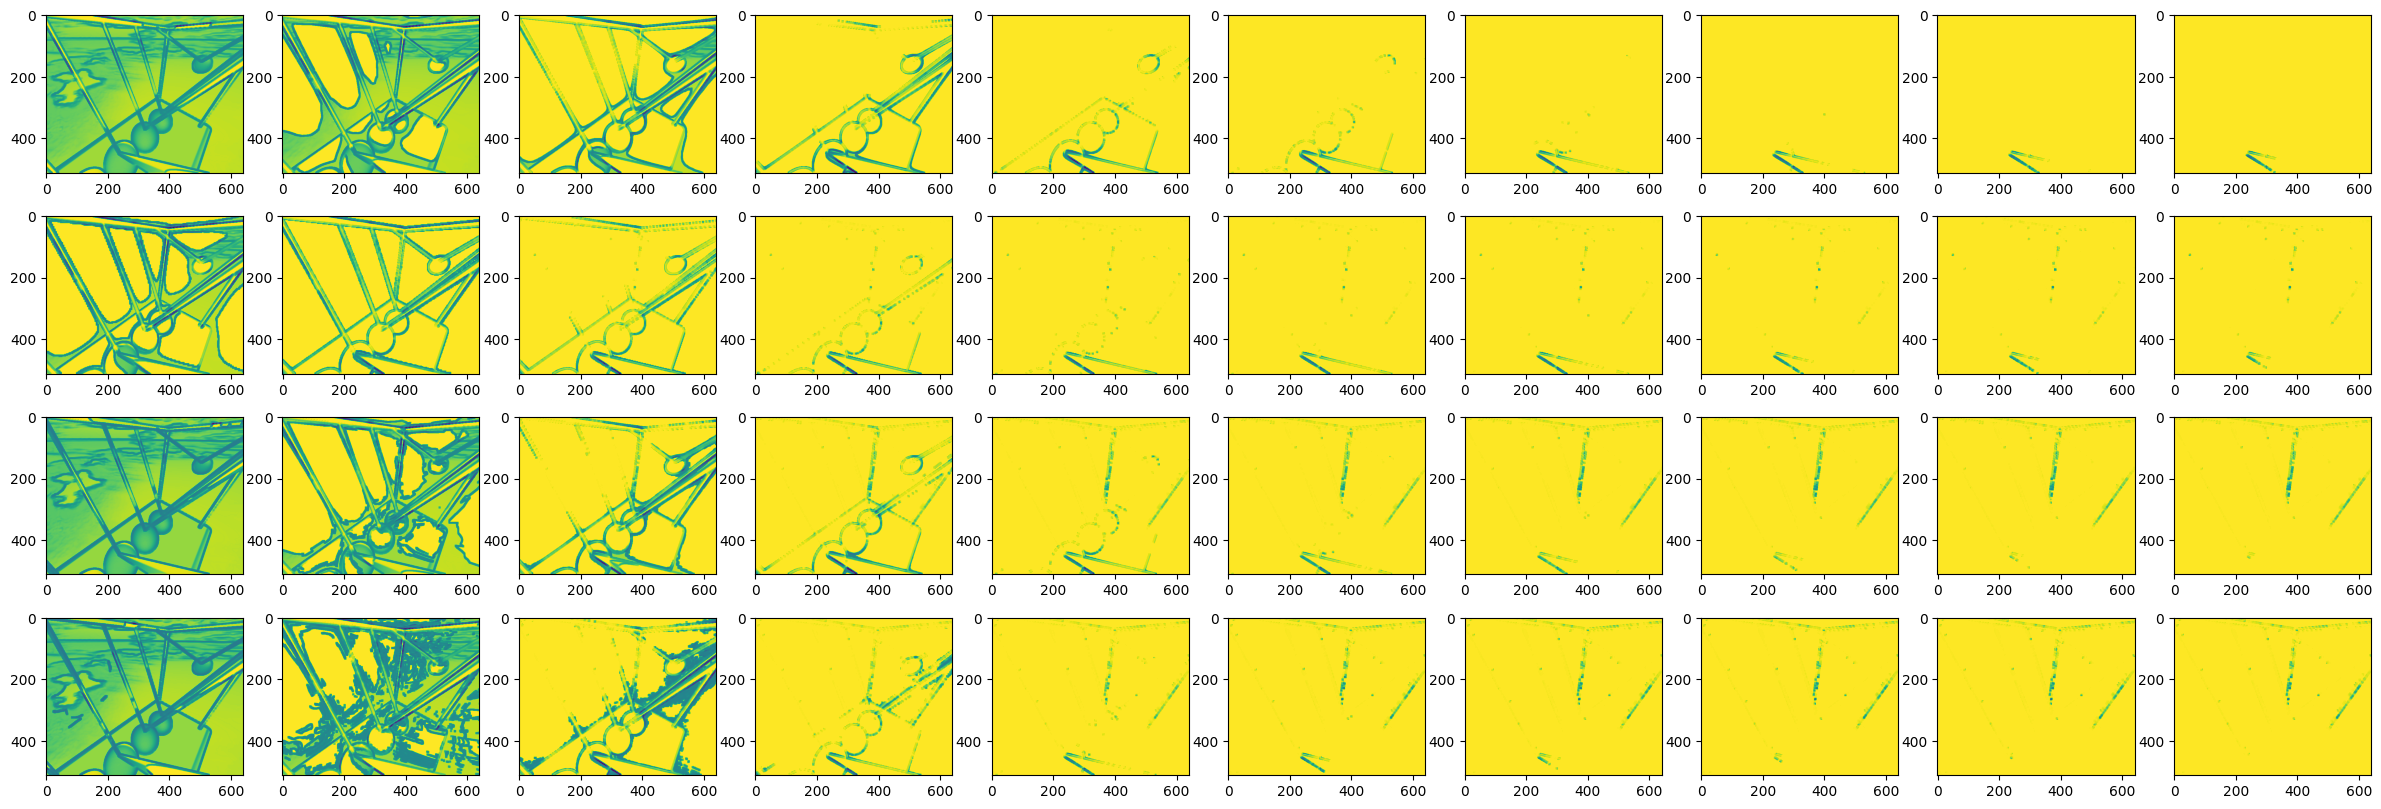

In [9]:
h = len(benchmark_images)
w = max([len(images) for _, images in benchmark_images.items()])

fig = plt.figure(figsize=(30, 10))

for y, (method, images) in enumerate(benchmark_images.items()):
    for x, (max_iteration_count, image_bgr) in enumerate(images):
        image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
        
        (_, diff) = ssim(baseline_image_gray, image_gray, full=True)

        index = y * w + x + 1
        fig.add_subplot(h, w, index)
        plt.imshow(diff)

plt.show()